<a href="https://colab.research.google.com/github/deborahanneharris/SuperDSWorkshops/blob/master/ConsoleGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First Step: Upload data set

In [1]:
!curl -O https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/1_workshop_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1214k  100 1214k    0     0  1668k      0 --:--:-- --:--:-- --:--:-- 1666k


In [2]:
!head 1_workshop_data.csv


Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1
6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26


In [0]:
import pandas as pd


In [5]:
df = pd.read_csv('1_workshop_data.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00


The CSO (Chief Strategy Officer) has posed you the following questions:
*  How have the total sales of console games been declining over the years by different genres?
*  How do different platforms compare side-by-side in terms of aggregate global sales since their inceptions? Who is the leader?
*  How do different publishers compare side-by-side in terms of aggregate global sales since their inceptions? Who is the leader?
*  How do the New Generation (New Gen) consoles compare in terms of total global sales for combined 2014 and 2015? New Gen platforms in this dataset are PS4, XOne and WiiU.
*  What are the top 10 game titles with the highest global sales?

DataFrame from Pandas

In [6]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [8]:
df_sales = df.assign(Total_Sales=df.NA_Sales+df.EU_Sales+df.JP_Sales+df.Other_Sales)
# make total sales column 
df_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [10]:
df_groupsales = df_sales.groupby(['Genre','Year']).Total_Sales.agg(['sum'])
df_groupsales.head()

sum
Genre  Year       
Action 1980   0.34
       1981  14.79
       1982   6.50
       1983   2.86
       1984   1.85

In [0]:
import matplotlib.pyplot as plt


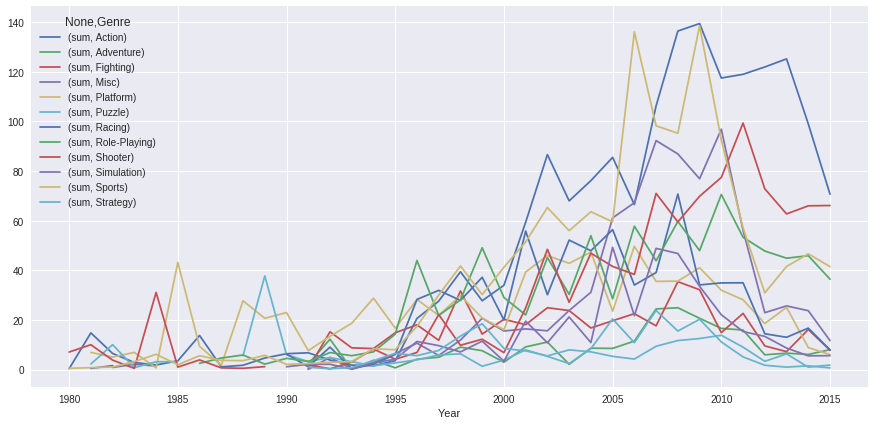

In [14]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_sales.groupby(['Genre','Year']).Total_Sales.agg(['sum']).unstack(level=0).plot(ax=ax)
#unstack to get the Genre as separate columns


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html

In [15]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [18]:
df_sales.groupby('Platform').Total_Sales.sum()

Platform
2600      86.48
3DO        0.10
3DS      239.63
DC        15.95
DS       817.65
GB       254.43
GBA      312.88
GC       196.73
GEN       28.35
GG         0.04
N64      218.01
NES      251.05
NG         1.44
PC       251.64
PCFX       0.03
PS       727.56
PS2     1233.56
PS3      946.84
PS4      238.83
PSP      291.66
PSV       58.24
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      909.20
WiiU      78.51
X360     968.48
XB       251.57
XOne     128.72
Name: Total_Sales, dtype: float64

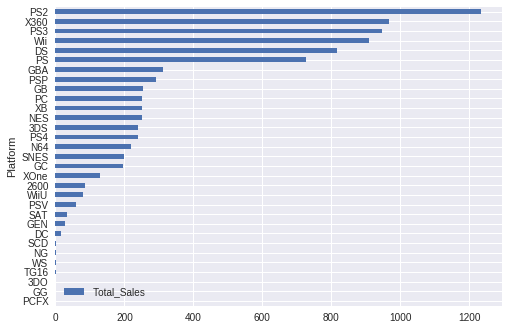

In [28]:
df_sales.groupby('Platform').Total_Sales.sum().reset_index().sort_values('Total_Sales').set_index('Platform').plot.barh()

In [29]:
df_sales.groupby('Publisher').Total_Sales.sum()

Publisher
10TACLE Studios                             0.11
1C Company                                  0.10
20th Century Fox Video Games                1.93
2D Boy                                      0.04
3DO                                        10.15
49Games                                     0.04
505 Games                                  55.22
5pb                                         1.59
7G//AMES                                    0.06
989 Sports                                  0.37
989 Studios                                13.30
AQ Interactive                              0.56
ASC Games                                   2.02
ASCII Entertainment                        10.90
ASCII Media Works                           0.27
ASK                                         0.03
Abylight                                    0.08
Acclaim Entertainment                      64.01
Accolade                                    1.66
Ackkstudios                                 0.84
Acquire   

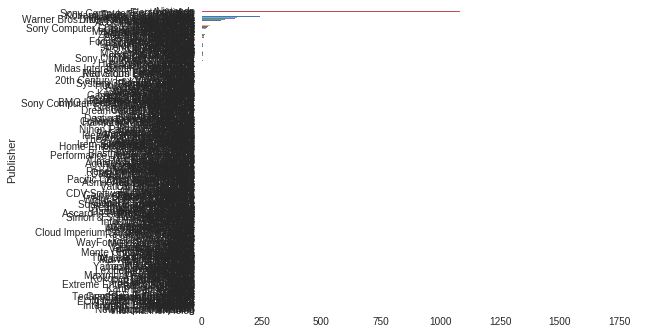

In [31]:
df_sales.groupby('Publisher').Total_Sales.sum().sort_values().plot.barh()
#too many need to subset

In [33]:
len(df_sales.Publisher.unique())
# so many publishers!!

565

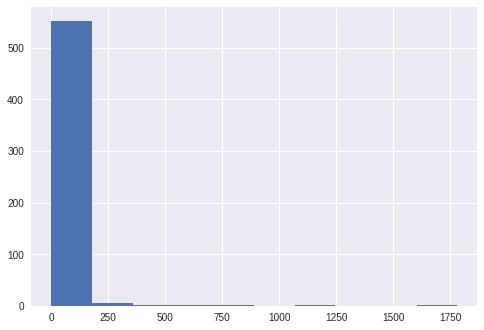

In [35]:
h = df_sales.groupby('Publisher').Total_Sales.sum().hist()
# almost all the publishers have very few sales!

In [37]:
dir(h)
type(h)

matplotlib.axes._subplots.AxesSubplot

In [38]:
sum(df_sales.groupby('Publisher').Total_Sales.sum()>100)

16

In [0]:
publisher_sales = df_sales.groupby('Publisher').Total_Sales.sum().sort_values()

mask = publisher_sales >100

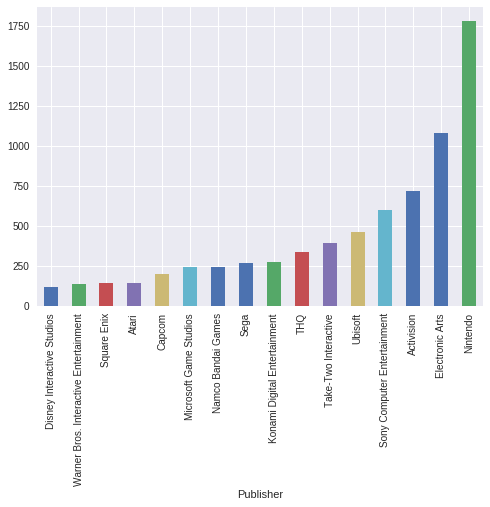

In [43]:
publisher_sales[mask].plot.bar()
# single value/attribute of data no parenthesis, function has parenthesis

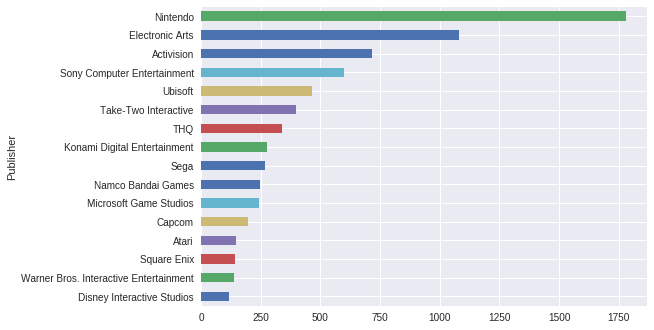

In [44]:
publisher_sales[mask].plot.barh()

How do the New Generation (New Gen) consoles compare in terms of total global sales for combined 2014 and 2015? New Gen platforms in this dataset are PS4, XOne and WiiU.


In [0]:
new_gen_mask = df_sales.Platform.isin(('PS4','XOne',"WiiU")) & df_sales.Year.isin((2014,2015))
new_gen = df_sales[new_gen_mask]

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html#pandas.DataFrame.where

In [47]:
new_gen.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
44,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
93,94,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.80,3.30,0.14,1.37,7.61


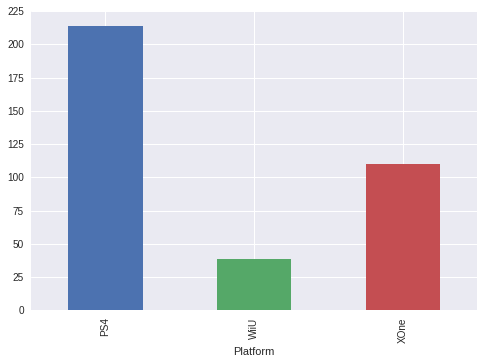

In [55]:
new_gen.groupby('Platform').Total_Sales.sum().plot.bar()


https://stackoverflow.com/questions/40420240/grouped-bar-graph-pandas

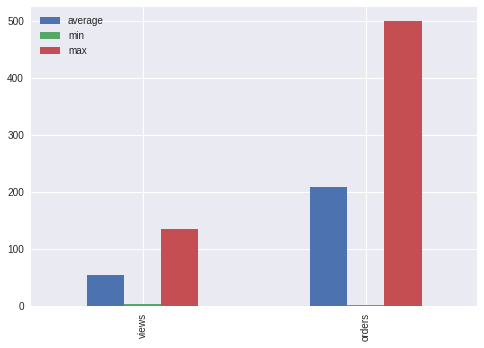

In [51]:
import pandas as pd

groups = [[23,135,3], [123,500,1]]
group_labels = ['views', 'orders']

# Convert data to pandas DataFrame.
so_df = pd.DataFrame(groups, index=group_labels).T

# Plot.
pd.concat(
    [so_df.mean().rename('average'), so_df.min().rename('min'), 
     so_df.max().rename('max')],
    axis=1).plot.bar()

In [52]:
pd.concat(
    [so_df.mean().rename('average'), so_df.min().rename('min'), 
     so_df.max().rename('max')],
    axis=1)

,average,min,max
views,53.666667,3,135
orders,208.000000,1,500


What are the top 10 game titles with the highest global sales?

In [56]:
help(df_sales.groupby('Name').Total_Sales.sum().sort_values)

Help on method sort_values in module pandas.core.series:

sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last') method of pandas.core.series.Series instance
    Sort by the values along either axis
    
    .. versionadded:: 0.17.0
    
    Parameters
    ----------
    axis : {0, 'index'}, default 0
        Axis to direct sorting
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
         the by.
    inplace : bool, default False
         if True, perform operation in-place
    kind : {'quicksort', 'mergesort', 'heapsort'}, default 'quicksort'
         Choice of sorting algorithm. See also ndarray.np.sort for more
         information.  `mergesort` is the only stable algorithm. For
         DataFrames, this option is only applied when sorting on a single
         column or label.
    na_position : {'first', 'la

In [59]:
top_10 = df_sales.groupby('Name').Total_Sales.sum().sort_values(ascending=False)[0:10]
top_10

Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.83
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.38
Call of Duty: Modern Warfare 3    30.84
New Super Mario Bros.             30.01
Call of Duty: Black Ops II        29.73
Name: Total_Sales, dtype: float64

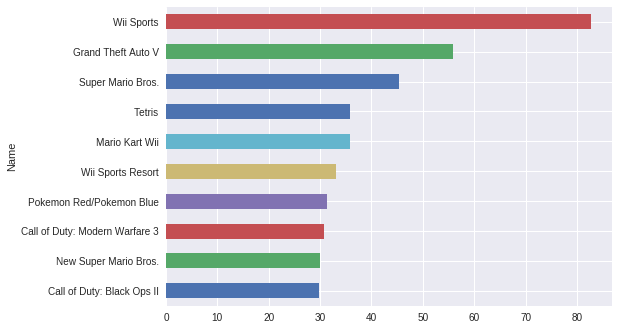

In [62]:
top_10.sort_values(ascending=True).plot.barh()